# Plotting Functions

 Matplotlib has a number of different plotting functions -- many more than we'll cover here, in fact. There's a more complete list in the pyplot documentation, and Matplotlib gallery is a great place to get examples of all of them.  

However, a full list and/or the gallery can be a bit overwhelming at first. Instead we'll condense it down and give you a look at some of the ones you're most likely to use, and then go over a subset of those in more detail.

Here's a simplified visual overview of matplotlib's most commonly used plot types.  Let's browse through these, and then we'll go over a few in more detail. Clicking on any of these images will take you to the code that generated them. We'll skip that for now, but feel browse through it later.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## The Basics: 1D series/points

<a  href="examples/plot_example.py"><img src="images/plot_example.png"></a>
<a href="examples/scatter_example.py"><img src="images/scatter_example.png"></a>
<a href="examples/bar_example.py"><img src="images/bar_example.png"></a>
<a href="examples/fill_example.py"><img src="images/fill_example.png"></a>

## 2D Arrays and Images
<a href="examples/imshow_example.py"><img src="images/imshow_example.png"></a>
<a href="examples/pcolor_example.py"><img src="images/pcolor_example.png"></a>
<a href="examples/contour_example.py"><img src="images/contour_example.png"></a>

## Vector Fields
<a href="examples/vector_example.py"><img src="images/vector_example.png"></a>

## Data Distributions
<a href="examples/statistical_example.py"><img src="images/statistical_example.png"></a>

# Input Data: 1D Series

We've briefly mentioned `ax.plot(x, y)` and `ax.scatter(x, y)` to draw lines and points, respectively.  We'll cover some of their options (markers, colors, linestyles, etc) in the next section. Let's move on to a couple of other common plot types.

---
## Bar Plots: `ax.bar(...)` and `ax.barh(...)`

Bar plots are one of the most common plot types.  Matplotlib's `ax.bar(...)` method can also plot general rectangles, but the default is optimized for a simple sequence of x, y values, where the rectangles have a constant width.  There's also `ax.barh(...)` (for horizontal), which makes a constant-height assumption instead of a constant-width assumption.

### Simple bar plot

<BarContainer object of 5 artists>

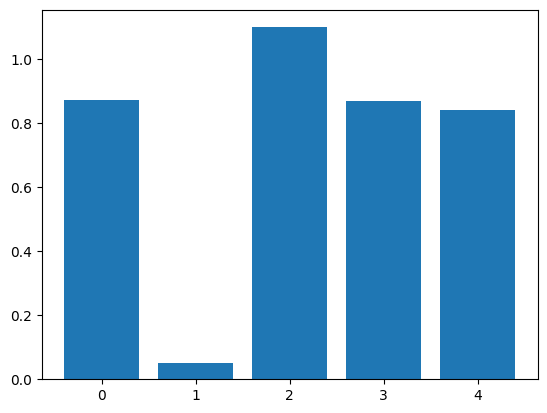

In [4]:
# seed initialization for keeping the random number same every time
np.random.seed(2)

# define X and Y values for plot
x = np.arange(5)
y = np.random.random(5) * 2

# create the subplot
# with this method it is possible to plot multiple subplots in a single figure
fig, ax = plt.subplots()

# for ploting bar plot we use .bar function provided by matplotlib
ax.bar(x, y)

#plt.show()

The x and y vlaues we can see here:

In [5]:
x

array([0, 1, 2, 3, 4])

In [7]:
y

array([0.8719898 , 0.05185246, 1.09932496, 0.87064479, 0.8407356 ])

#### Adding errorbars...

Matplotlib line plots and bar charts can include `error bars`. Error bars are useful to problem solvers because error bars show the confidence or precision in a set of measurements or calculated values. Bar charts without error bars give the illusion that a measured or calculated value is known to high precision or high confidence.

we can pass the argument `xerr=error` or `yerr=error` to plot the error bars in vertical or horizontal axis based on what do we want to show. 



<BarContainer object of 5 artists>

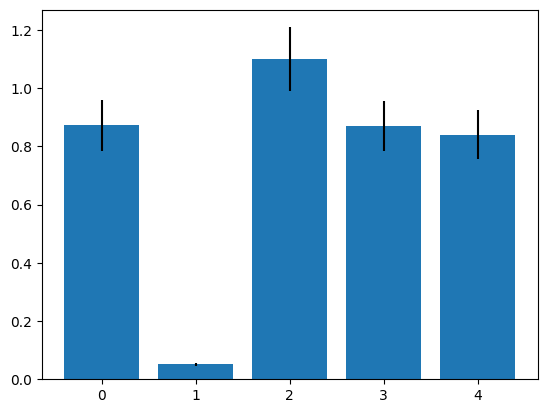

In [11]:
np.random.seed(2)
x = np.arange(5)
y = np.random.random(5) * 2

# defining error here
error = y * 0.1

fig, ax = plt.subplots()

# we pass the error here as an argument to show the errors on the plot
ax.bar(x, y, yerr=error)
#plt.show()

If we have negative values, we can use `axhline` to draw an axis "spine" to mark the zero line.



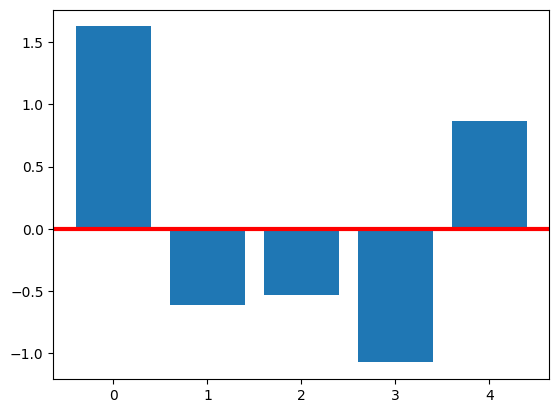

In [13]:
np.random.seed(1)
x = np.arange(5)
y = np.random.randn(5)

fig, ax = plt.subplots()
ax.bar(x, y)

# here we define the axline to mark the hrozintal axis here and pass argument to customize it. 
ax.axhline(y =0, color='red', linewidth=3)
#plt.show()

Matplotlib plotting methods return an `Artist` or a sequence of artists.  Anything you can see in a Matplotlib figure/axes/etc. is an `Artist` of some sort. Most of the time, you will not need to retain these returned objects. You will want to capture them for special customizing that may not be possible through the normal plotting mechanism.

Let's re-visit that last example and modify what's plotted.  In the case of `bar`, a container artist is returned, so we'll modify its contents instead of the container itself (thus, `for bar in vert_bars`).

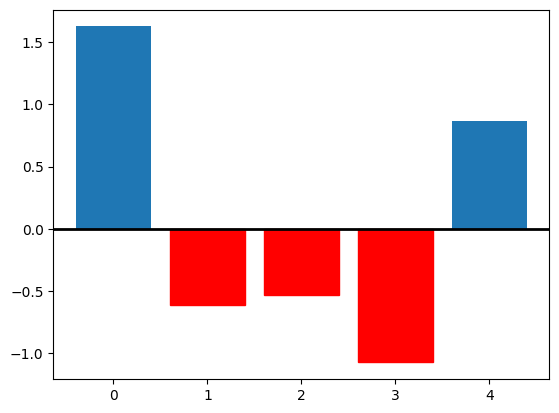

In [14]:
fig, ax = plt.subplots()

# Store the output of the call to .bar
vert_bars = ax.bar(x, y) 

# We could have also done this with two separate calls to `ax.bar` and numpy boolean indexing.
for bar, height in zip(vert_bars, y):
    # checking for the vlauses if the are less then aero/negative
    if height < 0:
        # setting custom color for the bars
        bar.set(color='red')
        
ax.axhline(y=0, color='black', linewidth=2)
#plt.show()


Looking at the artist returned by `ax.bar` we can see that they are all plain rectangles.


In [16]:
for bar in vert_bars:
    print(bar)

Rectangle(xy=(-0.4, 0), width=0.8, height=1.62435, angle=0)
Rectangle(xy=(0.6, 0), width=0.8, height=-0.611756, angle=0)
Rectangle(xy=(1.6, 0), width=0.8, height=-0.528172, angle=0)
Rectangle(xy=(2.6, 0), width=0.8, height=-1.07297, angle=0)
Rectangle(xy=(3.6, 0), width=0.8, height=0.865408, angle=0)


---
# Input Data: 2D Arrays or Images

There are several options for plotting 2D datasets.  `imshow`, `pcolor`, and `pcolormesh` have a lot of overlap, at first glance.  The image above is meant to clarify that somewhat. 


In short, `imshow` can interpolate and display large arrays very quickly, while `pcolormesh` and `pcolor` are much slower, but can handle flexible (i.e. more than just rectangular) arrangements of cells.

We won't dwell too much on the differences and overlaps here.  They have overlapping capabilities, but different default behavior because their primary use-cases are a bit different (there's also `matshow`, which is `imshow` with different defaults).  

Instead we'll focus on what they have in common.

`imshow`, `pcolor`, `pcolormesh`, `scatter`, and any other Matplotlib plotting methods that map a range of data values onto a colormap will return artists that are instances of `ScalarMappable.`  In practice, what that means is a) you can display a colorbar for them, and b) they share several keyword arguments.

---
## Displaying 2d data with `imshow`

In [42]:
arr_2d = np.arange(9).reshape((3, 3))
arr_2d



array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

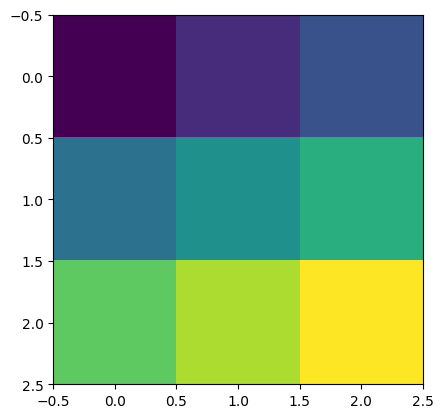

In [44]:
fig, ax = plt.subplots()
ax.imshow(arr_2d)
#plt.show()

`imshow` is used most of the times to display images.

(-0.5, 639.5, 426.5, -0.5)

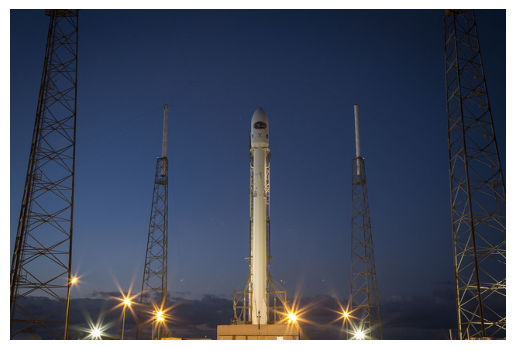

In [45]:
# Read images into numpy array. Usually imageio would be used here.
# see https://imageio.github.io/
img = plt.imread("images/rocket.png")

fig, ax = plt.subplots()
ax.imshow(img)
ax.axis("off")
#plt.show()

For visualizing matrices, `matshow` provides better defaults, e.g. axis labelling.

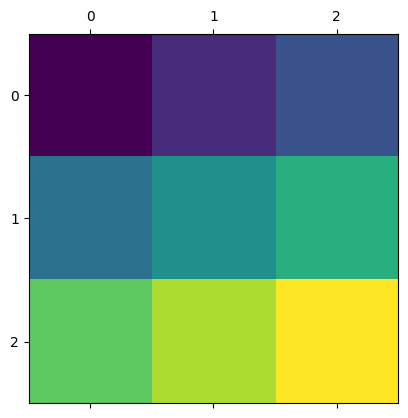

In [47]:
fig, ax = plt.subplots()
ax.matshow(arr_2d)
#plt.show()


---
## Colorbars

Just seeing the colors does not necessarily tell us something about the values beneath. Let's add a colorbar to the figure to display what colors correspond to values of `data` we've plotted. 

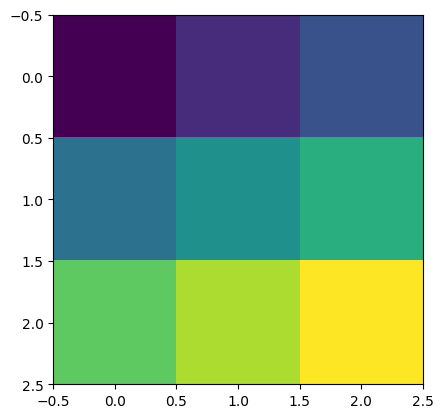

In [50]:
arr_2d = np.arange(9).reshape((3, 3))
fig, ax = plt.subplots()
im = ax.imshow(arr_2d)
plt.show()

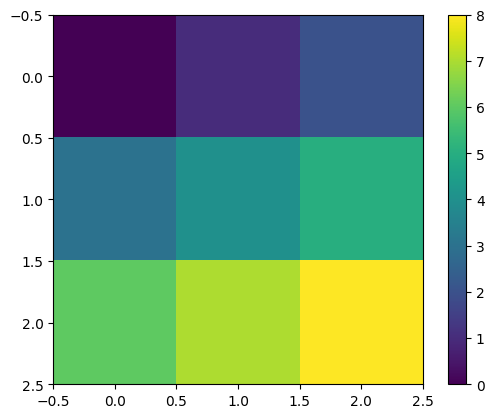

In [51]:
arr_2d = np.arange(9).reshape((3, 3))
fig, ax = plt.subplots()
im = ax.imshow(arr_2d)

# adding color bar 
fig.colorbar(im)
plt.show()

In [52]:
arr_2d

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

You may notice that `colorbar` is a `Figure` method and not an `Axes` method.  That's because `colorbar` doesn't operate on the axes. Instead, it shrinks the current axes by a bit, adds a _new_ axes to the figure, and places the colorbar on that axes.

The new axes that `fig.colorbar` creates is fairly limited in where it can be positioned.   For example, it's always outside the axes it "steals" room from. Sometimes you may want to avoid "stealing" room from an axes or maybe even have the colorbar _inside_ another axes.  In that case, you can manually create the axes for the colorbar and position it where you'd like:

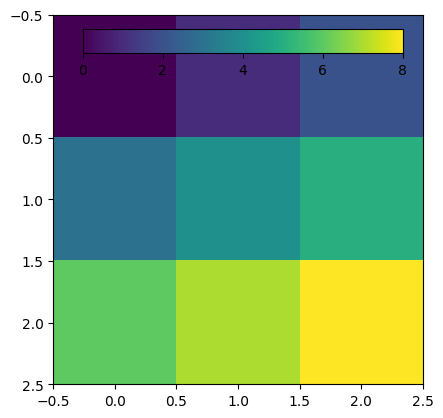

In [53]:
fig, ax = plt.subplots()

cax = fig.add_axes([0.27, 0.8, 0.5, 0.05])

#https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.axes.Axes.imshow.html

im = ax.imshow(arr_2d)
fig.colorbar(im, cax=cax, orientation='horizontal')


plt.show()


### Shared parameters for `imshow`, `pcolormesh`, `contour`, `scatter`, etc
  
  As we mentioned earlier, any plotting method that creates a `ScalarMappable` will have some common kwargs.  The ones you'll use the most frequently are:
  
  * `cmap` : The colormap (or name of the colormap) used to display the input.  (We'll go over the different colormaps in the next section.)
  * `vmin` : The minimum data value that will correspond to the "bottom" of the colormap (defaults to the minimum of your input data).
  * `vmax` : The maximum data value that will correspond to the "top" of the colormap (defaults to the maximum of your input data).
  * `norm` : A `Normalize` instance to control how the data values are mapped to the colormap. By default, this will be a linear scaling between `vmin` and `vmax`, but other norms are available (e.g. `LogNorm`, `PowerNorm`, etc).
  
`vmin` and `vmax` are particularly useful.  Quite often, you'll want the colors to be mapped to a set range of data values, which aren't the min/max of your input data. For example, you might want a symmetric ranges of values around 0.

As an example of that, let's use a divergent colormap on some example data. Note how the colormap is **not** centered at zero.

/tmp/ipykernel_9841/2710567466.py:2: MatplotlibDeprecationWarning: In a future release, get_sample_data will automatically load numpy arrays.  Set np_load to True to get the array and suppress this warning.  Set asfileobj to False to get the path to the data file and suppress this warning.
  data = np.load(get_sample_data('axes_grid/bivariate_normal.npy'))


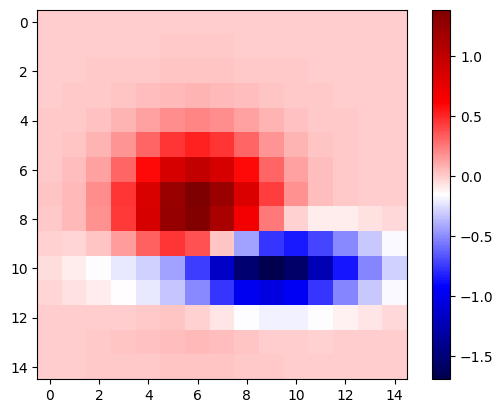

In [54]:
from matplotlib.cbook import get_sample_data
data = np.load(get_sample_data('axes_grid/bivariate_normal.npy'))

fig, ax = plt.subplots()

# https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.axes.Axes.imshow.html
im = ax.imshow(data, cmap='seismic')
fig.colorbar(im)
plt.show()


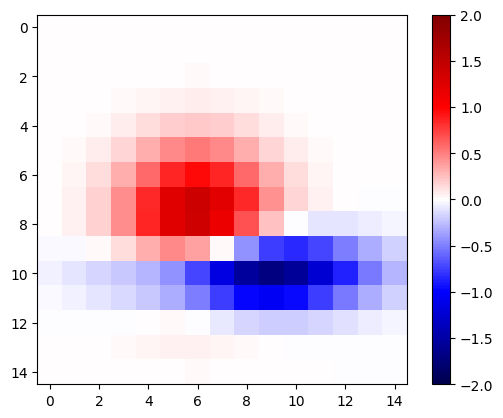

In [55]:
fig, ax = plt.subplots()
im = ax.imshow(data, cmap='seismic', vmin=-2, vmax=2)
fig.colorbar(im)
plt.show()


---
## Scatter for n-dimensional data
`scatter` allows to map several dimensions to different aesthetics such as x-postion, color, size and shape.

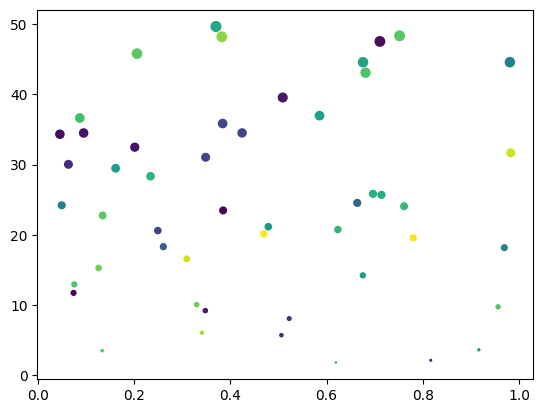

In [48]:
n = 50
x1 = np.random.random(n)
x2 = np.random.random(n) * 50
x3 = np.random.random(n)


y = x1 + x2 + x3

fig, ax = plt.subplots()
#https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.axes.Axes.scatter.html
sc = ax.scatter(x=x1, y=y, s=x2, c=x3, marker='o')
#plt.show()


In the next section we will see, that there are a lot of different markers, mpl supports, which can help to emphasize different distributions.

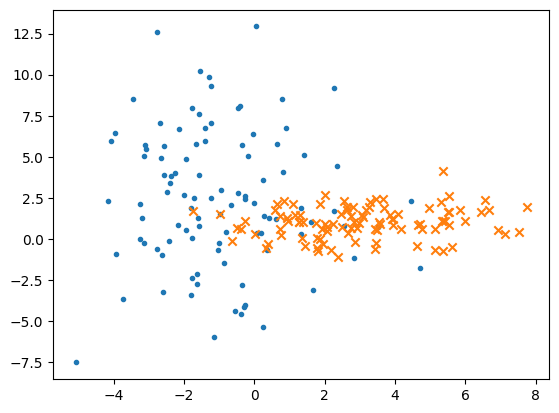

In [49]:
num = 100

x1 = np.random.normal(-1, 2, num)
y1 = np.random.normal(3, 4, num)
x2 = np.random.normal(3, 2, num)
y2 = np.random.normal(1, 1, num)

fig, ax = plt.subplots()
ax.scatter(x1, y1, marker='.')
ax.scatter(x2, y2, marker='x')
#plt.show()

---
# Visualizing statistical distributions

Draw samples from a normal distribution.

In [33]:
μ = 0
σ = 1
num_samples = 1000
dist = np.random.normal(μ, σ, num_samples)

**Side note on unicode characters as variables.** Since Python 3 we can use any unicode character such as μ and σ as variables. This can make sense in scientific programming if strong naming conventions exist. A good example is mean and standard deviation of a normal distribution. To easily obtain common characters you can use latex style and type e.g. `\mu` followed by <kbd>tab</kbd> to obtain μ. However, do not overuse this. Clearly named characters are often easier to read.

---
## Histograms
Histograms a great way to visualize univariate distributions. The data is divided into equally sized bins. Then we count how many data points fall into each bin. Finally, we draw a bar with the width of the corresponding bin and the height of the count.

The standard histogram looks like this.

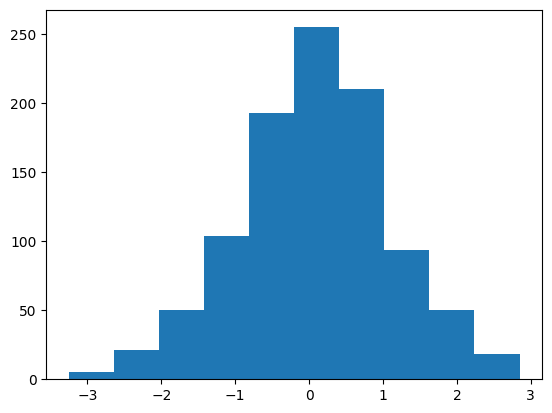

In [34]:
fig, ax = plt.subplots()
ax.hist(dist)
plt.show()

We can control the number of bins.

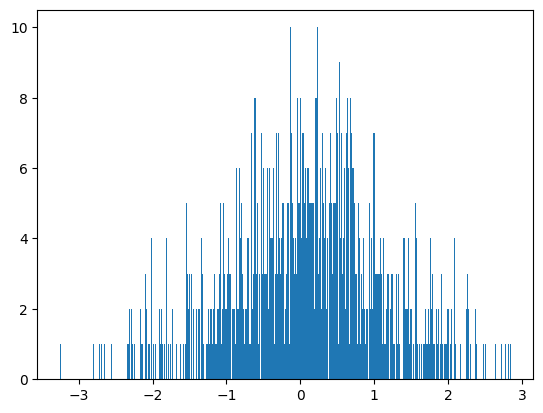

In [36]:
fig, ax = plt.subplots()
ax.hist(dist, bins=500)
plt.show()

Or let it be automatically determined.

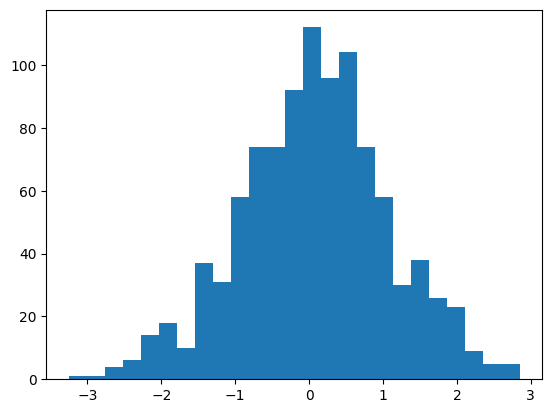

In [38]:
fig, ax = plt.subplots()
ax.hist(dist, bins='auto')
plt.show()

Using `density=True` will create a normalized histogram that can be interpreted as a probability density. 

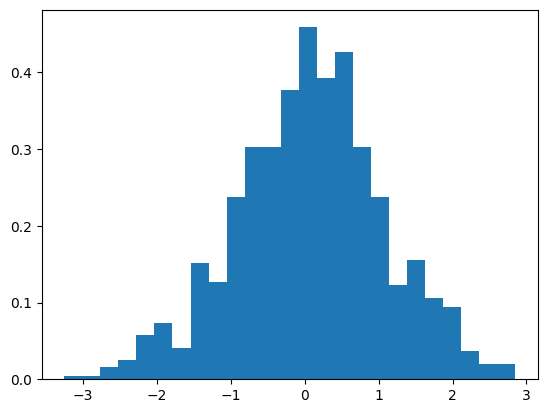

In [40]:
fig, ax = plt.subplots()
ax.hist(dist, bins='auto', density=True)
plt.show()

---
## Boxplots
Boxplots are another standard way to summarize univariate distributions. The give a compact visual description of important *summary statistics*. 
A box is drawn at the 25% and 75% quantile, that is where most of the data is. Additionally, the median is marked by a line inside the box.
The *whiskers* extend 1.5 times the *inter quartile range* beyond the quartiles. Every point beyond that is drawn individually as a *flier* or *outlier*. See also https://flowingdata.com/2008/02/15/how-to-read-and-use-a-box-and-whisker-plot/ for a nice illustration.

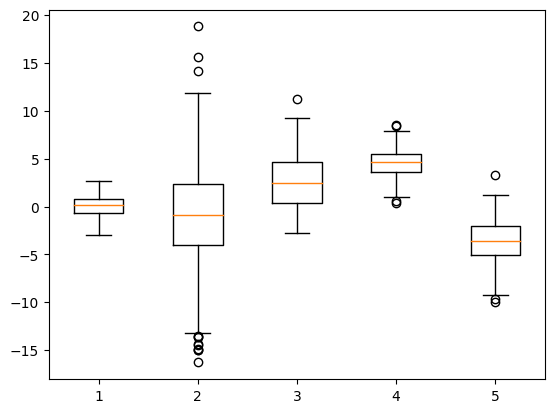

In [28]:
fig, ax = plt.subplots()
ax.boxplot(dist)
plt.show()

`boxplot` can also be used to display several distributions at once.

In [29]:
import reprlib # This is for obtaining printable versions of large data sets.
means = [0, -1, 2.5, 4.3, -3.6]
sigmas = [1.2, 5, 3, 1.5, 2]
# Each distribution has a different number of samples.
nums = [150, 1000, 100, 200, 500]

dists = [np.random.normal(*args) for args in zip(means, sigmas, nums)]
reprlib.repr(dists)

'[array([-1.562... -1.06052558]), array([  0.49...  1.6913241 ]), array([ 3.623... -2.13740254]), array([4.2044..., 4.17713078]), array([-5.928...88431042e+00])]'

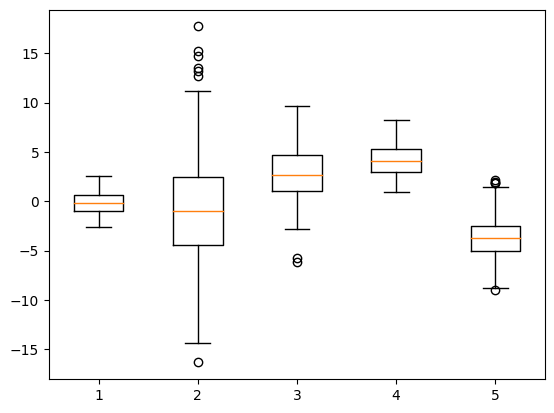

In [31]:
fig, ax = plt.subplots()
ax.boxplot(dists)
plt.show()

---
## Violinplots
Violinplots are a third common way to visualize distributions. For violinplots a *kernel density estimate* is computed for the whole range of data. This gives a smooth estimate of the probabiliy density function underlying the data.
The `violinplot`function behaves similar to `boxplot`. For further information, have a look at https://en.wikipedia.org/wiki/Violin_plot.

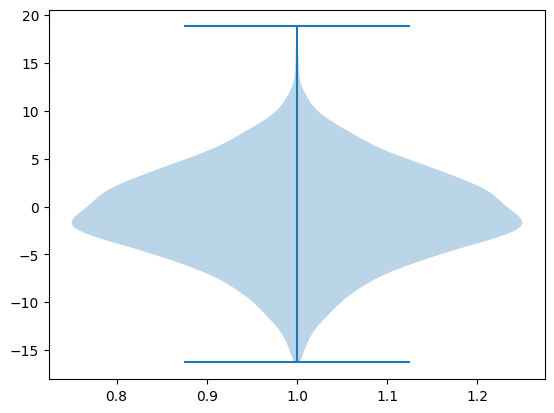

In [26]:
fig, ax = plt.subplots()
ax.violinplot(dist)
plt.show()

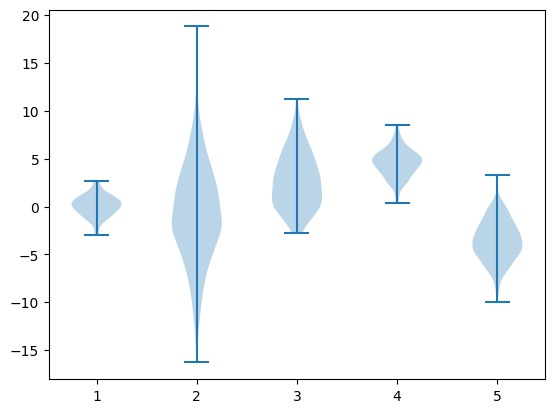

In [22]:
fig, ax = plt.subplots()
ax.violinplot(dists)
plt.show()

---
## Pie charts
Pie charts a well known way to visualize categorical distributions.

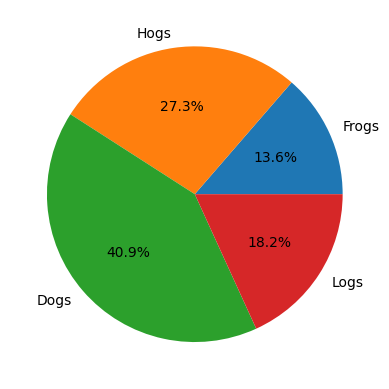

In [17]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 20]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.show()

We will cover more advanced and more convenient methods for statistical visualization in a later lecture.